In [70]:
import numpy as np
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [71]:
df = pd.read_csv('daily_total.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['DATE'] > '2022-08-10']
# fill missing dates with 0
df.index = df['DATE']
df = df.reindex(pd.date_range(min(df['DATE']), max(df['DATE'])), fill_value=0).drop('DATE', axis=1)
df

,USERCOUNT,SECONDSSPENT,QUANTITY,VOLUME,WEIGHT,PRICE
2022-08-16,15,24864,1564,5.510447,606.628000,7714.46
2022-08-17,46,648639,153271,900.823306,87245.837728,731227.04
2022-08-18,72,1535976,353781,2687.981897,247269.820740,2135600.74
2022-08-19,70,1253113,395921,2944.799061,262781.058485,2136707.30
2022-08-20,6,67002,593,14.290446,975.280591,14861.86
...,...,...,...,...,...,...
2023-09-25,101,1171721,854092,2678.434373,292547.191456,1875797.61
2023-09-26,110,1249771,1016887,3483.392239,371822.547589,2318629.60
2023-09-27,104,1257222,939123,2998.222002,300263.198492,1850064.42
2023-09-28,109,1339688,1224169,3863.465093,384720.606181,2390796.27


In [72]:
periods = 7

model = pm.auto_arima(df['SECONDSSPENT'], 
                      m=periods, 
                      seasonal=True, 
                      start_p=0, 
                      start_q=0, 
                      max_order=4, 
                      test='adf', 
                      trace=True, 
                      error_action='ignore', 
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=12256.182, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=12424.248, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=12167.553, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=12200.522, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=12826.309, Time=0.01 sec


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=12345.077, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=12160.175, Time=0.21 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=12161.924, Time=0.21 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=12333.387, Time=0.17 sec
 ARIMA(2,0,0)(2,0,0)[7] intercept   : AIC=12173.599, Time=0.28 sec


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=inf, Time=0.54 sec


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=12192.381, Time=0.21 sec
 ARIMA(2,0,1)(2,0,0)[7] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(1,0,0)(2,0,0)[7]             : AIC=12160.623, Time=0.12 sec

Best model:  ARIMA(1,0,0)(2,0,0)[7] intercept
Total fit time: 4.000 seconds


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [73]:
# split into train and test sets
# train_size = int(len(df) * 0.8)
# test_size = len(df) - train_size
train, test = df[:-periods], df[-periods:]
print(train.shape, test.shape)

(403, 6) (7, 6)


In [74]:
model.fit(train['SECONDSSPENT'])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  403
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -5973.993
Date:                           Fri, 15 Dec 2023   AIC                          11957.987
Time:                                   01:34:49   BIC                          11977.982
Sample:                               08-16-2022   HQIC                         11965.903
                                    - 09-22-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.902e+05   9.23e+04      7.482      0.000    5.09e+05    8.71e+05
ar.L1          0.0258      0.087      0.297      0.767      -0.145       0.196
ar.S.L7        0.3398      0.075      4.507      0.000       0.192       0.488
ar.S.L14       0.2166      0.077      2.797      0.005       0.065       0.368
sigma2      6.942e+11      0.019   3.73e+13      0.000    6.94e+11    6.94e+11
===================================================================================
Ljung-Box (L1) (Q):                  37.76   Jarque-Bera (JB):                16.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.09e+36. Standard errors may be unstable.
"""

In [75]:
# add 7 days to df
last_day = df.index[-1]
forecast = model.predict(n_periods=periods + 7, return_conf_int=True)
forecast_range = pd.date_range(start=last_day - pd.DateOffset(days=periods - 1), periods=periods + 7, freq='D')
forecast_df = pd.DataFrame(forecast[0], index=forecast_range, columns=['FORECAST'])
df_forecast = pd.concat([df['SECONDSSPENT'], forecast_df], axis=1)
df_forecast.tail(14)

,SECONDSSPENT,FORECAST
2023-09-23,227385.0,7.083601e+05
2023-09-24,0.0,7.084807e+05
2023-09-25,1171721.0,1.416243e+06
2023-09-26,1249771.0,1.347906e+06
2023-09-27,1257222.0,1.421689e+06
2023-09-28,1339688.0,1.372048e+06
2023-09-29,1381580.0,1.333889e+06
2023-09-30,NaN,9.491853e+05
2023-10-01,NaN,9.492263e+05
2023-10-02,NaN,1.474182e+06


In [76]:
# df_forecast['DATE'] = df_forecast.index
# df_forecast.to_csv('arima_forecast.csv', index=False)

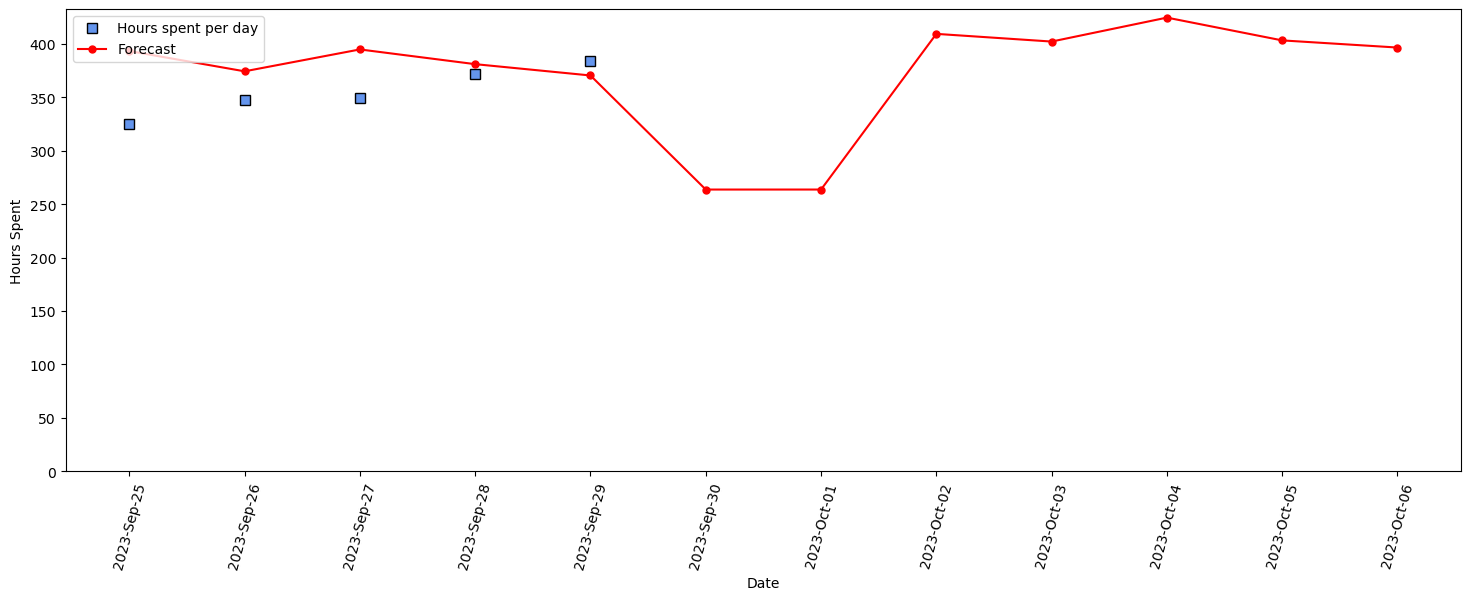

In [82]:
df_plot = df_forecast[-(periods + 5):]
date = df_plot.index

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
ax.plot(date, df_plot['SECONDSSPENT'] / 3600, 
        linestyle='none', 
        marker='s',
        markerfacecolor='cornflowerblue', 
        markeredgecolor='black',
        markersize=7,
        label='Hours spent per day')
ax.plot(date, df_plot['FORECAST'] / 3600, 
        linestyle='-',
        marker='o',
        markersize=5,
        color='red',
        label='Forecast')
# set min and max of y-axis
ax.set_ylim(bottom=0)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))
ax.set_xlabel('Date')
ax.set_ylabel('Hours Spent')
plt.xticks(rotation=75)
ax.legend(loc='upper left')
plt.show()

In [81]:
mae = np.mean(np.abs(df_plot['SECONDSSPENT'] - df_plot['FORECAST'])) / 3600
print('MAE: %.3f hours' % mae)

MAE: 32.621 hours


In [79]:
# fit ARIMA(1,0,0)(2,0,0)[7]